In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/clustered_bound_data_2.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [4]:
print bound_data[0]

[0.1, 1.6, 1.0, 1.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.21456884301847282, 0.7440729937925361, 0.0413581631889911, 0.18470274305276274, 0.0]


In [4]:
lens = [row for row in bound_data if len(row) != 14]
print lens

In [5]:
ratios = [row[-2] for row in bound_data]
print max(ratios)
print min(ratios)

0.888540738393
1.97867485408e-05


In [6]:
groups = [0, 1, 2]
groups_order = [0, 1, 2]
grouped_ratios = [[ratios[i] for i in range(len(ratios)) if bound_data[i][-1] == g] for g in groups_order]

In [7]:
mins = [min(row) for row in grouped_ratios]
maxs = [max(row) for row in grouped_ratios]
print mins
print maxs

[1.978674854082474e-05, 0.40508513315930206, 0.2665434573693932]
[0.26654338883416573, 0.8885407383934321, 0.4050845920956171]


In [16]:
group_means = [round(sum(grouped_ratios[i])/len(grouped_ratios[i]), 4) for i in groups_order]
Group_names = ['A', 'C', 'B']
colours = ['darkcyan', 'forestgreen', 'orangered']
overall_mean = round(sum(ratios)/len(ratios), 4)
labs = ['Group ' + Group_names[i] + ', ' + r"$\mathbb{E}[E]$" + ' = ' + str(group_means[i]) for i in range(len(Group_names))]
labs_order = [labs[0], labs[2], labs[1]]

In [17]:
A = [maxs[i] - mins[i] for i in range(3)]
B = [2*(obs/min(A)) for obs in A]
print B

[3.847573539978748, 6.979235534478681, 2.0]


In [18]:
num_bins = [8, 14, 4]
bins = [[mins[g] + i*(maxs[g]-mins[g])/float(num_bins[g]) for i in range(num_bins[g]+1)] for g in groups]
print bins

[[1.978674854082474e-05, 0.03333523700924394, 0.06665068726994705, 0.09996613753065016, 0.1332815877913533, 0.16659703805205642, 0.1999124883127595, 0.23322793857346263, 0.26654338883416573], [0.40508513315930206, 0.43961767639031135, 0.47415021962132065, 0.5086827628523299, 0.5432153060833392, 0.5777478493143485, 0.6122803925453577, 0.646812935776367, 0.6813454790073763, 0.7158780222383856, 0.7504105654693949, 0.7849431087004042, 0.8194756519314135, 0.8540081951624228, 0.8885407383934321], [0.2665434573693932, 0.3011787410509492, 0.33581402473250516, 0.3704493084140611, 0.4050845920956171]]


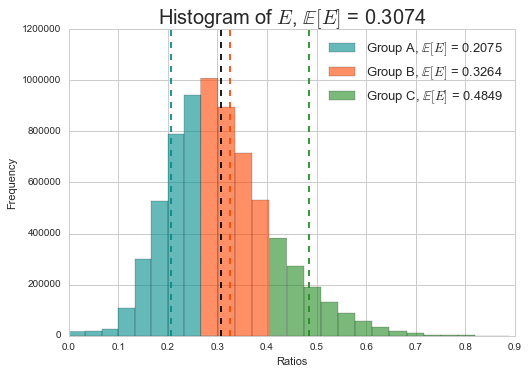

In [19]:
width = 1.0/20.0
fig, ax = plt.subplots()
for i in [0, 2, 1]:
    plt.hist(grouped_ratios[i], bins=bins[i], alpha=0.6, color=colours[i], label=labs[i])
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(labs_order, fontsize=13)
ax.set_title('Histogram of ' + r"$E$" + ', ' + r"$\mathbb{E}[E]$" + ' = ' + str(overall_mean), fontsize=20)
for i in range(3):
    plt.axvline(group_means[i], color=colours[i], linestyle="dashed")
plt.axvline(overall_mean, color='black', linestyle="dashed")
plt.show()